# Skalierung von Featuren

### Warum Skalierung?

Abstandsalgorithmen wie KNN, K-means und SVM werden am stärksten durch den Bereich der Merkmale beeinflusst. Das liegt daran, dass sie hinter den Kulissen Abstände zwischen Datenpunkten verwenden, um deren Ähnlichkeit zu bestimmen.

Wenn zwei Merkmale unterschiedliche Skalen haben, besteht die Möglichkeit, dass den Merkmalen mit höherer Größe eine höhere Gewichtung gegeben wird. Dies wirkt sich auf die Leistung des Algorithmus für maschinelles Lernen aus, und wir möchten natürlich nicht, dass unser Algorithmus gegenüber einem Merkmal voreingenommen ist.

##### Beispiel

<img src='https://github.com/Aafaaq77/EinblickeMachineLearning/blob/main/img/beispiel.PNG?raw=1' >

##### Welche Algorithmen sind scale-variant oder scale-invariant?

Es gibt eine Familie von Algorithmen, die skaleninvariant sind, wie z. B. die baumbasierten Algorithmen, bei denen eine Skalierung nicht erforderlich ist, da sie keine abstandsbasierten Modelle sind.
So treffen wir Entscheidungen: "Ist Merkmal x_i >= some_val?" Intuitiv können wir sehen, dass es wirklich keine Rolle spielt, auf welcher Skala dieses Feature liegt (Zentimeter, Fahrenheit, eine standardisierte Skala - es spielt wirklich keine Rolle).

Einige Algorithmen wie z. B. die lineare Diskriminanzanalyse (LDA) und Naive Bayes gewichten die Merkmale auf der Grundlage ihrer Range, sodass die Skalierung diese Algorithmen nicht beeinflusst.

Es gibt andere Algorithmen, bei denen die Skalierung hilfreich ist. Das sind Abstandsalgorithmen wie KNN, K-means und SVM werden am stärksten durch den Bereich der Merkmale beeinflusst. Das liegt daran, dass sie hinter den Kulissen Abstände zwischen Datenpunkten verwenden, um deren Ähnlichkeit zu bestimmen. Die Skalierung hilft uns, eine Verzerrung in Richtung der Merkmale mit hohem Wert zu vermeiden. 

Auch neuronale Netze profitieren von der Skalierung von Merkmalen.
Im Allgemeinen werden Merkmale skaliert, da dies zu einer schnelleren Konvergenz in gradientenabhängigen Algorithmen führt. Wie unten gezeigt.

### Standardisierung und Normalisierung

##### Standardisierung - Z-Score

Das Ergebnis der Standardisierung (oder Z-Score-Normalisierung) ist, dass die Merkmale so umskaliert werden, dass sie die Eigenschaften einer Standardnormalverteilung mit
- μ=0 und
- σ=1

wobei μ der Mittelwert (Durchschnitt) und σ die Standardabweichung vom Mittelwert ist; die Standard-Scores (auch z-Scores genannt) der Stichproben werden wie folgt berechnet:

<img src='https://github.com/Aafaaq77/EinblickeMachineLearning/blob/main/img/standardisierung.PNG?raw=1'>

Die Standardisierung der Merkmale, so dass sie um 0 mit einer Standardabweichung von 1 zentriert sind, ist nicht nur wichtig, wenn wir Messungen mit unterschiedlichen Einheiten vergleichen, sondern ist auch eine allgemeine Anforderung für viele Algorithmen des maschinellen Lernens. Intuitiv können wir an den Gradientenabstieg als prominentes Beispiel denken (ein Optimierungsalgorithmus, der oft in logistischer Regression, SVMs, Perceptrons, neuronalen Netzen usw. verwendet wird); mit Merkmalen, die auf unterschiedlichen Skalen liegen, können bestimmte Gewichte schneller aktualisiert werden als andere, da die Merkmalswerte xj eine Rolle bei den Gewichtsaktualisierungen spielen

Außerdem sollten wir uns überlegen, ob wir unsere Daten "standardisieren" oder "normalisieren" (hier: Skalierung auf den Bereich [0, 1]) wollen. Einige Algorithmen gehen davon aus, dass unsere Daten bei 0 zentriert sind. Wenn wir z. B. die Gewichte eines kleinen mehrschichtigen Perzeptrons mit tanh-Aktivierungseinheiten auf 0 oder kleine Zufallswerte zentriert um 0 initialisieren, wollen wir die Modellgewichte "gleichmäßig" aktualisieren. Als Faustregel würde ich sagen: Im Zweifelsfall einfach die Daten standardisieren, das kann nicht schaden.

### Normalisierung - Min-Max scalling

Ein alternativer Ansatz zur Z-Score-Normalisierung (oder Standardisierung) ist die sogenannte Min-Max-Skalierung (oft auch einfach "Normalisierung" genannt - eine häufige Ursache für Unklarheiten).
Bei diesem Ansatz werden die Daten auf einen festen Bereich skaliert - normalerweise 0 bis 1.
Der Preis für diesen begrenzten Bereich - im Gegensatz zur Normierung - ist, dass wir am Ende kleinere Standardabweichungen haben, was den Effekt von Ausreißern unterdrücken kann.

Eine Min-Max-Skalierung wird typischerweise über die folgende Gleichung durchgeführt:

<img src='https://github.com/Aafaaq77/EinblickeMachineLearning/blob/main/img/normalisierung.PNG?raw=1'>

### Z-score Standardisierung oder Min-Max Normalisierung?

Normierung oder Min-Max-Skalierung?" - Auf diese Frage gibt es keine eindeutige Antwort: Es hängt wirklich von der Anwendung ab.

Zum Beispiel kann bei Clustering-Analysen die Standardisierung besonders wichtig sein, um Ähnlichkeiten zwischen Merkmalen auf Basis bestimmter Abstandsmaße zu vergleichen. Ein weiteres prominentes Beispiel ist die Hauptkomponentenanalyse, bei der wir in der Regel die Standardisierung der Min-Max-Skalierung vorziehen, da wir an den Komponenten interessiert sind, die die Varianz maximieren (abhängig von der Fragestellung und davon, ob die PCA die Komponenten über die Korrelationsmatrix statt über die Kovarianzmatrix berechnet; aber mehr zur PCA in meinem vorherigen Artikel).

Das heißt aber nicht, dass die Min-Max-Skalierung überhaupt nicht sinnvoll ist! Eine beliebte Anwendung ist die Bildverarbeitung, bei der die Pixelintensitäten normalisiert werden müssen, damit sie in einen bestimmten Bereich passen (z. B. 0 bis 255 für den RGB-Farbbereich). Außerdem erfordern typische Algorithmen für neuronale Netze Daten, die auf einer Skala von 0 bis 1 liegen.

### Standardisieren und Normalisieren - wie es mit scikit-learn gemacht werden kann

Natürlich könnten wir die Vektorisierungsfähigkeiten von NumPy nutzen, um die z-Scores für die Standardisierung zu berechnen und die Daten mithilfe der Gleichungen zu normalisieren, die in den vorherigen Abschnitten erwähnt wurden. Es gibt jedoch einen noch komfortableren Ansatz, der das Vorverarbeitungsmodul aus einer der Open-Source-Bibliotheken für maschinelles Lernen von Python, scikit-learn, verwendet.

### Beispiel am Wein-Datensatz

Für die folgenden Beispiele und Diskussionen werden wir uns den freien "Wine"-Datensatz ansehen, der auf dem UCI-Repository für maschinelles Lernen hinterlegt ist
(http://archive.ics.uci.edu/ml/datasets/Wine).

Der Wein-Datensatz besteht aus 3 verschiedenen Klassen, wobei jede Zeile einer bestimmten Weinprobe entspricht.

Die Klassenbezeichnungen (1, 2, 3) sind in der ersten Spalte aufgeführt, und die Spalten 2-14 entsprechen 13 verschiedenen Attributen (Features):

1) Alcohol (Alkohol (Prozent/Volumen))

2) Malic acid (Apfelsäure (g/l))

In [1]:
#load data

import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Wie in der obigen Tabelle zu sehen ist, werden die Merkmale Alkohol (Prozent/Volumen) und Apfelsäure (g/l) auf unterschiedlichen Skalen gemessen, so dass vor einem Vergleich oder einer Kombination dieser Daten eine Merkmalsskalierung notwendig ist.

##### Standardisierung

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
std_scale = StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

In [4]:
pd.DataFrame(df_std).head()

,0,1
0,1.518613,-0.562250
1,0.246290,-0.499413
2,0.196879,0.021231
3,1.691550,-0.346811
4,0.295700,0.227694


In [6]:
df['Alcohol']/10 

0      1.423
1      1.320
2      1.316
3      1.437
4      1.324
       ...  
173    1.371
174    1.340
175    1.327
176    1.317
177    1.413
Name: Alcohol, Length: 178, dtype: float64

Überprüfe Mean und Standardabweichung

In [7]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


##### Normalisierung

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax_scale = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [10]:
pd.DataFrame(df_minmax).head()

,0,1
0,0.842105,0.191700
1,0.571053,0.205534
2,0.560526,0.320158
3,0.878947,0.239130
4,0.581579,0.365613


Überprüfe minimalen und maximalen Wert

In [11]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))


Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


Plote das Ergebnis

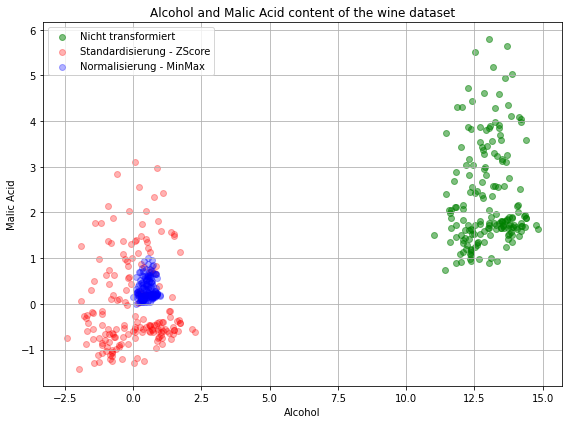

In [12]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='Nicht transformiert', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardisierung - ZScore', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='Normalisierung - MinMax', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()


Das obige Diagramm enthält die Weindatenpunkte auf allen drei verschiedenen Skalen: die Eingangsskala, auf der der Alkoholgehalt in Volumenprozent gemessen wurde (grün), die standardisierten Merkmale (rot) und die normalisierten Merkmale (blau). In der folgenden Darstellung werden wir in die drei verschiedenen Achsenskalen hineinzoomen

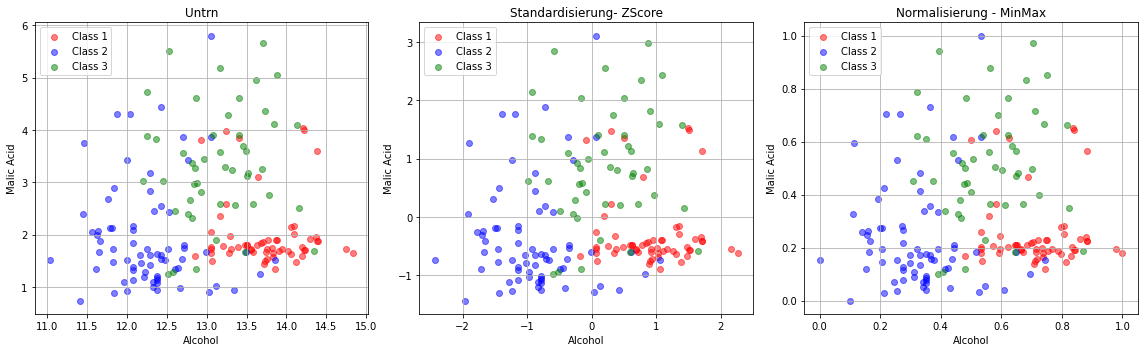

In [13]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Untrn',
                'Standardisierung- ZScore',
                'Normalisierung - MinMax')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

Die Anordnung der Datenpunkte zueinander oder verschiedenen Klassen zu einander ändert sich nicht.

### Skallierung anwenden

Wir werden wieder eine Visualisierungsfunktion nutzen.

In [14]:
from matplotlib.colors import ListedColormap

def plot_ergebnis(X_train, y_train, X_test, clf):
    X = np.vstack((X_train, X_test))
    y = np.hstack((y_train, y_test))
    
    plot_step = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Plot Entscheidungsfunktion und Datenpunkte + Vorhersagen
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['red', 'blue', 'green']))
    plt.scatter(X[:,0],  X[:,1], alpha=0.25, c=y, cmap=ListedColormap(['red', 'blue', 'green']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['red', 'blue', 'green']))

In [15]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=42)


In [16]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [17]:
minmax_scale = MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

In [18]:
from sklearn.metrics import accuracy_score

def evaluate_ergebnis(clf, X_tesft, y_test): 
    y_pred = clf.predict(X_tesft)
    print('accuracy %f' % accuracy_score(y_pred, y_test))

##### Entscheidungsbaum

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:
# on non-standardized data
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(X_train, y_train)

evaluate_ergebnis(dt, X_test, y_test)

accuracy 0.777778


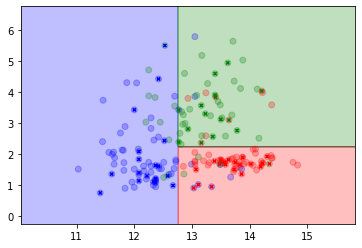

In [21]:
plot_ergebnis(X_train, y_train, X_test, dt)

In [22]:
# on non-standardized data
dt_std = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_std.fit(X_train_std, y_train)

evaluate_ergebnis(dt_std, X_test_std, y_test)

accuracy 0.777778


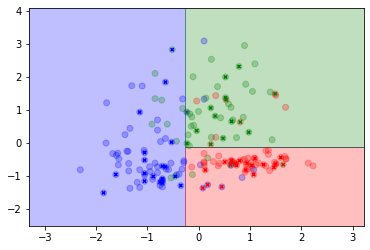

In [24]:
plot_ergebnis(X_train_std, y_train, X_test_std, dt_std)

In [23]:
# on normalized data
dt_minmax = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_minmax.fit(X_train_minmax, y_train)

evaluate_ergebnis(dt_minmax, X_test_minmax, y_test)

accuracy 0.777778


### Aufgabe

Trainieren Sie ebenfalls einen Gaussian Naive Bayes-Algorithmus und eine Support Vector Machine mit
- unskalierten 
- standardisieren 
- normalisierten 
Daten

##### Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
evaluate_ergebnis(clf, X_test, y_test)

accuracy 0.759259


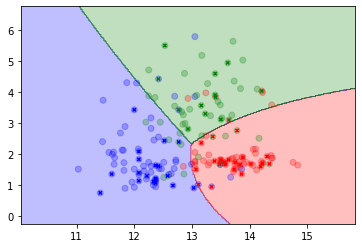

In [26]:
plot_ergebnis(X_train, y_train, X_test, clf)

accuracy 0.759259


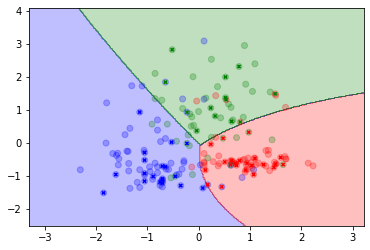

In [29]:
clf_std = GaussianNB()
clf_std.fit(X_train_std, y_train)
evaluate_ergebnis(clf_std, X_test_std, y_test)
plot_ergebnis(X_train_std, y_train, X_test_std, clf)

accuracy 0.759259


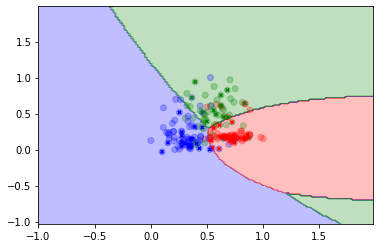

In [30]:
clf_min_max = GaussianNB()
clf_min_max.fit(X_train_minmax, y_train)
evaluate_ergebnis(clf_min_max, X_test_minmax, y_test)
plot_ergebnis(X_train_minmax, y_train, X_test_minmax, clf_min_max)

##### Support Vector Machine

accuracy 0.722222


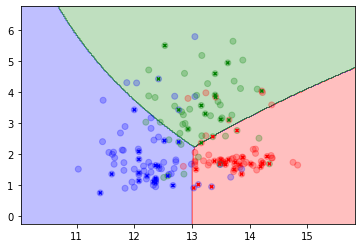

In [31]:
from sklearn.svm import SVC
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
evaluate_ergebnis(clf, X_test, y_test)
plot_ergebnis(X_train, y_train, X_test, clf)

accuracy 0.722222


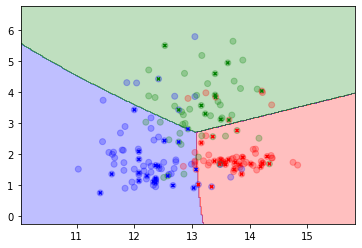

In [32]:
clf = SVC()
clf.fit(X_train, y_train)
evaluate_ergebnis(clf, X_test, y_test)
plot_ergebnis(X_train, y_train, X_test, clf)

accuracy 0.740741


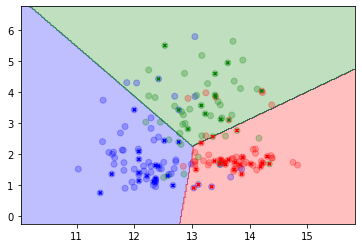

In [33]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
evaluate_ergebnis(clf, X_test, y_test)
plot_ergebnis(X_train, y_train, X_test, clf)

accuracy 0.388889


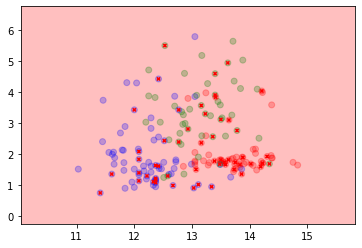

In [34]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
evaluate_ergebnis(clf, X_test, y_test)
plot_ergebnis(X_train, y_train, X_test, clf)

accuracy 0.722222


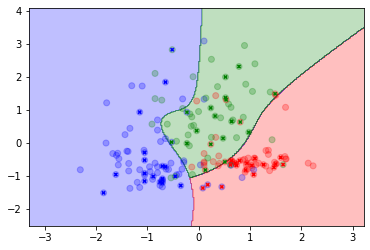

In [35]:
clf_std = SVC(kernel='poly')
clf_std.fit(X_train_std, y_train)
evaluate_ergebnis(clf_std, X_test_std, y_test)
plot_ergebnis(X_train_std, y_train, X_test_std, clf_std)

accuracy 0.740741


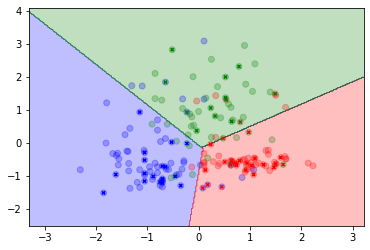

In [36]:
clf_std = SVC(kernel='linear')
clf_std.fit(X_train_std, y_train)
evaluate_ergebnis(clf_std, X_test_std, y_test)
plot_ergebnis(X_train_std, y_train, X_test_std, clf_std)

accuracy 0.796296


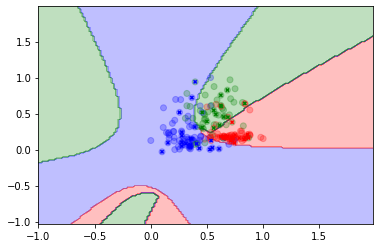

In [38]:
clf_min_max = SVC(kernel='poly')
clf_min_max.fit(X_train_minmax, y_train)
evaluate_ergebnis(clf_min_max, X_test_minmax, y_test)
plot_ergebnis(X_train_minmax, y_train, X_test_minmax, clf_min_max)

accuracy 0.759259


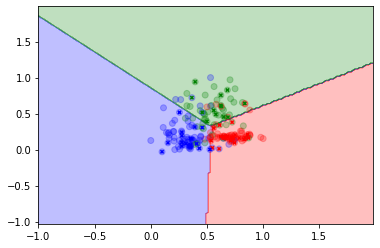

In [39]:
clf_min_max = SVC(kernel='linear')
clf_min_max.fit(X_train_minmax, y_train)
evaluate_ergebnis(clf_min_max, X_test_minmax, y_test)
plot_ergebnis(X_train_minmax, y_train, X_test_minmax, clf_min_max)

accuracy 0.796296


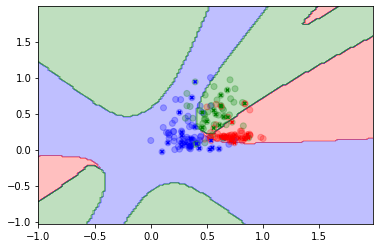

In [40]:
clf_min_max = SVC(kernel='poly',degree=4)
clf_min_max.fit(X_train_minmax, y_train)
evaluate_ergebnis(clf_min_max, X_test_minmax, y_test)
plot_ergebnis(X_train_minmax, y_train, X_test_minmax, clf_min_max)

accuracy 0.092593


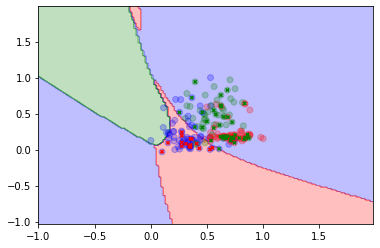

In [41]:
clf_min_max = SVC(kernel='sigmoid')
clf_min_max.fit(X_train_minmax, y_train)
evaluate_ergebnis(clf_min_max, X_test_minmax, y_test)
plot_ergebnis(X_train_minmax, y_train, X_test_minmax, clf_min_max)

accuracy 0.777778


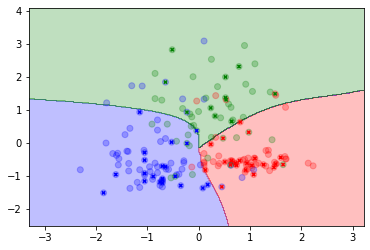

In [42]:
clf_std = SVC(kernel='sigmoid')
clf_std.fit(X_train_std, y_train)
evaluate_ergebnis(clf_std, X_test_std, y_test)
plot_ergebnis(X_train_std, y_train, X_test_std, clf_std)

##### Quellen

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

https://medium.datadriveninvestor.com/feature-scaling-why-what-where-how-683f61812f4c

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/